In [ ]:
# INFERENCE CSRNET_CBAM

In [22]:
import torch
from model import CSRNet_CBAM  
checkpoint = torch.load('cbammodel_best.pth.tar', map_location='cpu')  # or 'cuda' if using GPU

model = CSRNet_CBAM()

model.load_state_dict(checkpoint['model_state_dict'])

model.eval()

CSRNet_CBAM(
  (frontend): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, di

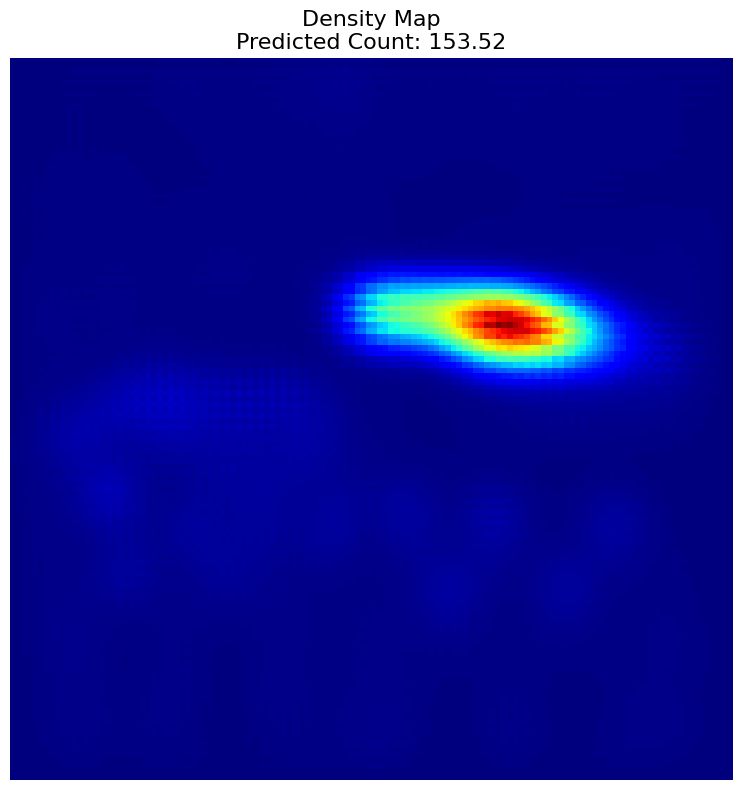

In [26]:
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

img_paths_A = 'IMG_900.png'
img = Image.open(img_paths_A).convert('RGB')
img_tensor = transform(img).unsqueeze(0)

with torch.no_grad():
    output = model(img_tensor)

predicted_count = output.sum().item()


plt.figure(figsize=(10, 8))
plt.imshow(output.squeeze().numpy(), cmap='jet')
plt.title(f'Density Map\nPredicted Count: {predicted_count:.2f}', fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()

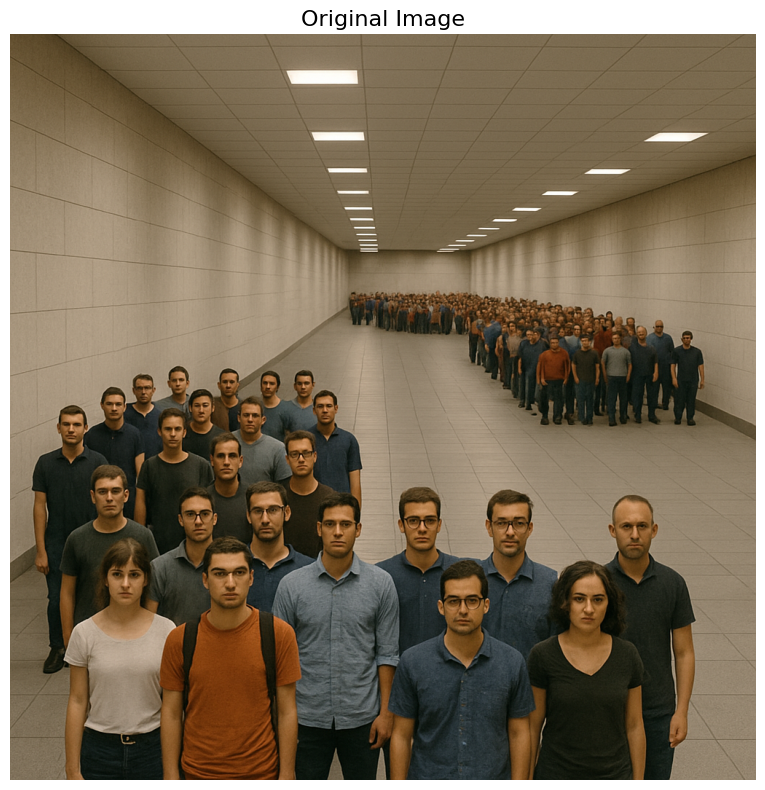

In [27]:

plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.title('Original Image', fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# INFERENCE CSRNET

In [4]:
import torch
from model import CSRNet # Make sure this matches your model definition

# Load the best model checkpoint
checkpoint = torch.load('crnetmodel_best.pth.tar', map_location='cpu')  # or 'cuda' if using GPU

# Initialize the model
model = CSRNet()

# Load the model weights from checkpoint
model.load_state_dict(checkpoint['model_state_dict'])

# Set model to evaluation mode
model.eval()

CSRNet(
  (frontend): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilatio

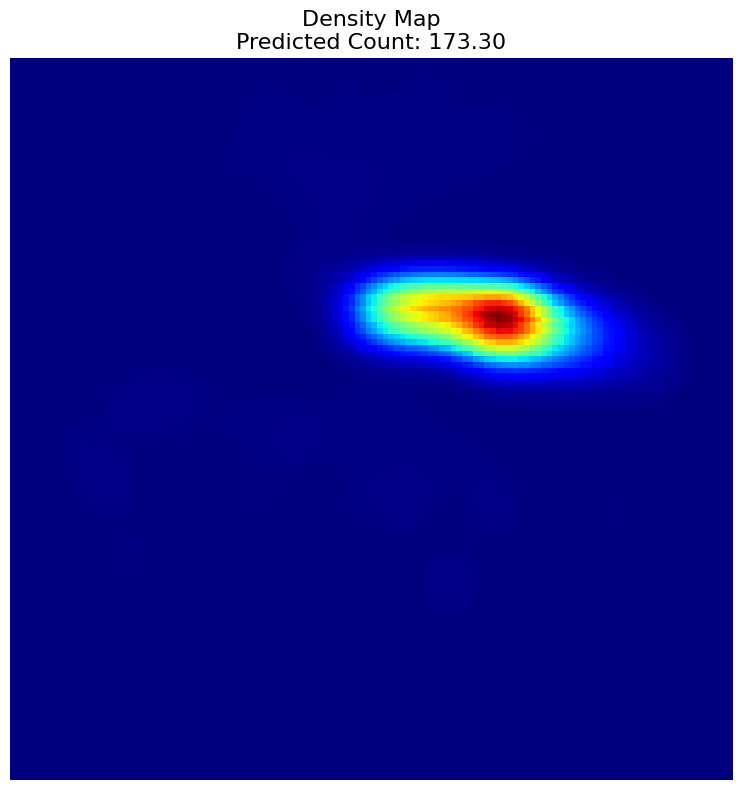

In [8]:
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

img_paths_A = 'IMG_900.png'  # or loop through
img = Image.open(img_paths_A).convert('RGB')
img_tensor = transform(img).unsqueeze(0)

with torch.no_grad():
    output = model(img_tensor)

predicted_count = output.sum().item()

# Display Density Map and Predicted Count
plt.figure(figsize=(10, 8))
plt.imshow(output.squeeze().numpy(), cmap='jet')
plt.title(f'Density Map\nPredicted Count: {predicted_count:.2f}', fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()

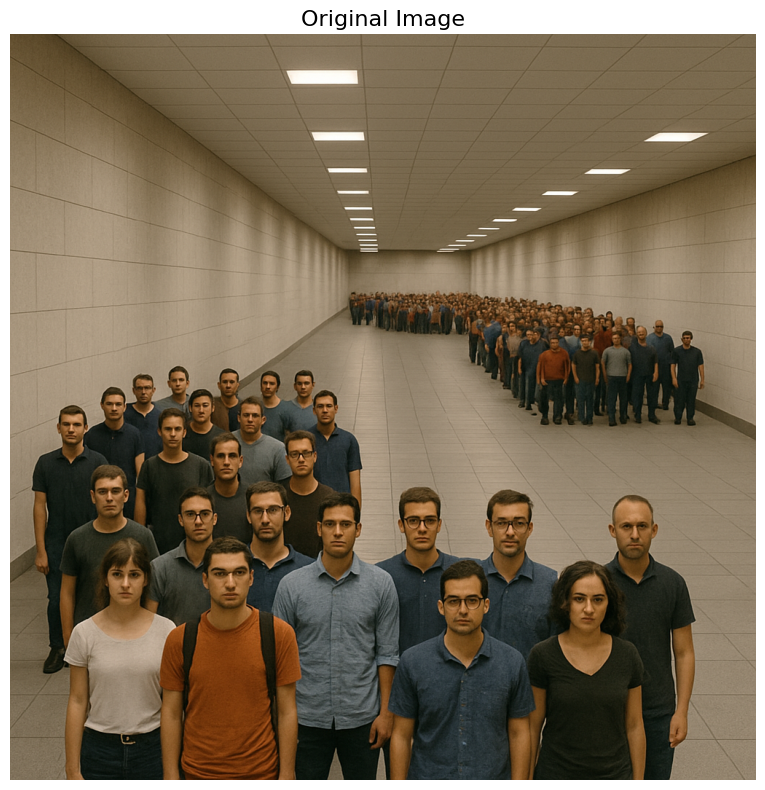

In [9]:

plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.title('Original Image', fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()

In [14]:
import importlib
import model
importlib.reload(model)

from model import CSRNet
import model
print(dir(model))

['CBAM', 'CSRNet', 'CSRNet_CBAM', 'ChannelAttention', 'SpatialAttention', 'VGG16_Weights', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'load_net', 'make_layers', 'models', 'nn', 'save_net', 'torch', 'vgg16']


In [ ]:
# training cbam using pretrained but our mae stuck at 100

In [18]:
model = CSRNet_CBAM()
x = torch.rand((1,3,255,255))
model(x).shape

torch.Size([1, 1, 31, 31])

In [19]:

checkpoint = torch.load('PartAmodel_best.pth.tar', map_location='cpu', weights_only=False)
pretrained_state = checkpoint['state_dict']
model_dict = model.state_dict()
pretrained_dict = {k: v for k, v in pretrained_state.items() if k in model_dict and 'frontend' in k}
model_dict.update(pretrained_dict)
model.load_state_dict(model_dict)

for param in model.frontend.parameters():
    param.requires_grad = False

optimizer = torch.optim.Adam(
    filter(lambda p: p.requires_grad, model.parameters()),
    lr=1e-5
)
print("Trainable parameters:")
for name, param in model.named_parameters():
    print(f"{'✅' if param.requires_grad else '❌'} {name}")


Trainable parameters:
❌ frontend.0.weight
❌ frontend.0.bias
❌ frontend.2.weight
❌ frontend.2.bias
❌ frontend.5.weight
❌ frontend.5.bias
❌ frontend.7.weight
❌ frontend.7.bias
❌ frontend.10.weight
❌ frontend.10.bias
❌ frontend.12.weight
❌ frontend.12.bias
❌ frontend.14.weight
❌ frontend.14.bias
❌ frontend.17.weight
❌ frontend.17.bias
❌ frontend.19.weight
❌ frontend.19.bias
❌ frontend.21.weight
❌ frontend.21.bias
✅ cbam.ca.fc.0.weight
✅ cbam.ca.fc.2.weight
✅ cbam.sa.conv.weight
✅ backend.0.weight
✅ backend.0.bias
✅ backend.2.weight
✅ backend.2.bias
✅ backend.4.weight
✅ backend.4.bias
✅ backend.6.weight
✅ backend.6.bias
✅ backend.8.weight
✅ backend.8.bias
✅ backend.10.weight
✅ backend.10.bias
✅ output_layer.weight
✅ output_layer.bias


In [21]:
!python train_new_cbam.py A_train.json A_val.json 0 0

/home/elicer/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/elicer/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
epoch 0, processed 0 samples, lr 0.0000100000
Epoch: [0][0/400]	Time 0.765 (0.765)	Data 0.013 (0.013)	Loss 12.4066 (12.4066)	
Epoch: [0][100/400]	Time 0.051 (0.119)	Data 0.023 (0.054)	Loss 25.8060 (41.2270)	
Epoch: [0][200/400]	Time 0.084 (0.118)	Data 0.036 (0.058)	Loss 45.8837 (35.2507)	
Epoch: [0][300/400]	Time 0.110 (0.117)	Data 0.029 (0.060)	Loss 9.5609 (30.3